# COVID-19 in India

## DARSHIL MARU <br> Linkedin: https://www.linkedin.com/in/darshil-maru-01/

COVID-19 is an infectious disease caused by the Corona Virus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China's Hubei province in December 2019 and has spread all over the world since then. As of writing this, on 26th April 2020, there are 2.92 million confirmed cases throughout the world and has resulted in 204,000 deaths according to Google.

In this notebook, I will take a look at the current situation in India. We will take a look at the regions which are most hampered by the outbreak and how numbers have steadily climbed in the country

To start off, we will import the necessary libraries which I will be using in my analysis and the different data tables from where I sourced my information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
%matplotlib notebook

In [2]:
covid19_df = pd.read_csv("./datasets/covid_19_india.csv")
individuals_df = pd.read_csv("./datasets/IndividualDetails.csv")

excel_file = pd.ExcelFile("./datasets/Indian States Population and Area.xlsx")
indian_states_df = excel_file.parse('Sheet1')

I am using three different sources of data in this analysis. I would like to thank Sudalai Rajkumar and his collaborators for the first two files which I downloaded from Kaggle. The last dataset is something which I collected from the Statewise Aadhaar saturation data in uidai website and from Wikipedia.

Let us have a look at the first few records from the COVID 19 dataset sourced from Kaggle.

In [3]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1313,1314,25/04/20,5:00 PM,Telengana,-,-,253,26,984
1314,1315,25/04/20,5:00 PM,Tripura,-,-,1,0,2
1315,1316,25/04/20,5:00 PM,Uttarakhand,-,-,25,0,48
1316,1317,25/04/20,5:00 PM,Uttar Pradesh,-,-,248,26,1778
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571


So we can see that the dataset provides a day by day record of the number of cases found in a specific state in the country. On further inspecting, we find that this dataset contains 1318 entries and contains 9 features. These are as seen contains some vital data like the number of confirmed cases, deaths, cured people till a specific day in a specific state. The Confirmed Cases are further broken down into Indian Nationals and Foreigners. The level of detail in this dataset is something which I loved the most !

In [5]:
covid19_df.shape

(1318, 9)

In [6]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Here, we see that there are no missing values in this dataset which makes my job more easier. Let us now have a look at the most recent records for each state to gain an idea about where we stand currently. From the last set of records, we can see that we have data till 25th April 2020.

In [7]:
covid19_df_latest = covid19_df[covid19_df['Date']=="25/04/20"]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1286,1287,25/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,1289,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36
1290,1291,25/04/20,5:00 PM,Bihar,-,-,46,2,228


In [8]:
covid19_df_latest['Confirmed'].sum()

24893

So now we have filtered the dataset of 1318 records on the basis of the most recent data for every state. On inspecting this data, we see that India has a total of 24,893 cases till 25th April 2020.

<h1>STATEWISE FIGURES</h1>

<IPython.core.display.Javascript object>


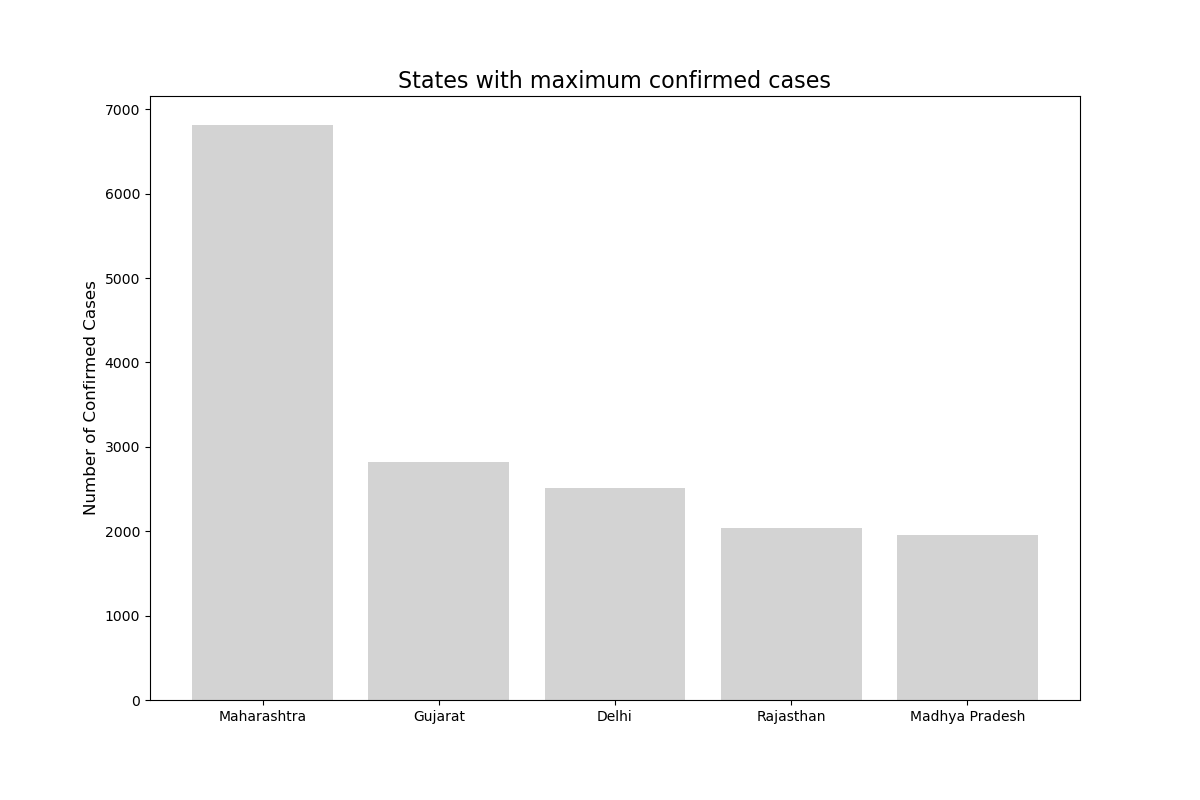

In [9]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Confirmed'][:5],
        align='center',color='lightgrey')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

On inspecting the above visualization, we see that Maharashtra has the most number of inspected cases as of now. Maharashtra is almost touching 7000 cases and may well have crossed that figure by the time I upload this notebook. The situation in Maharashtra is so grave that no other state in India has crossed even half that mark as per the data we have. Gujarat and Delhi are about to touch the 3000 mark whereas Rajasthan and Madhya Pradesh have just over 2000 cases.

In [10]:
covid19_df_latest['Deaths'].sum()

779

As per the data in the dataset, India has had 779 deaths across all states. We will now see which states have the most deaths.

<IPython.core.display.Javascript object>


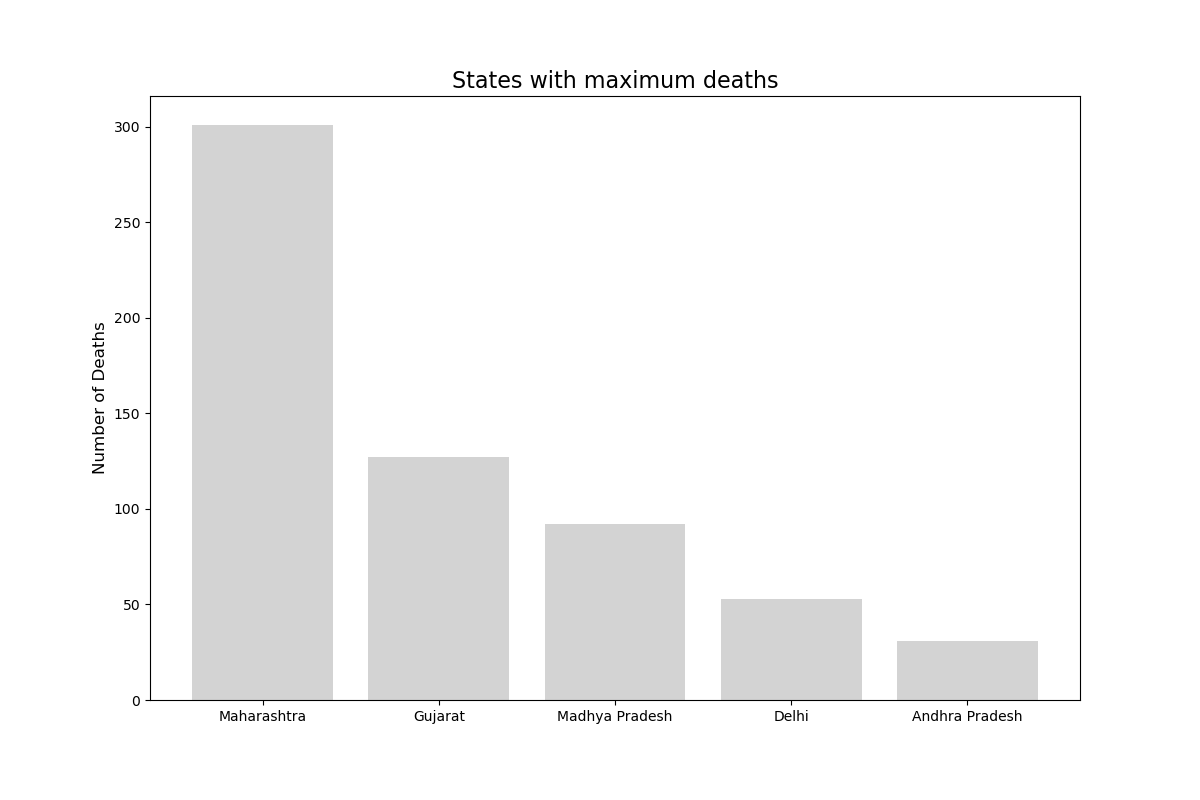

In [11]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with maximum deaths', size = 16)
plt.show()

It is hardly surprising that four of the five states which figured in the former graph appear in this graph as well. Maharashtra currently account for almost half of the deaths in India due to COVID-19. Second placed Gujarat has not reached the halfway mark here as well. Madhya Pradesh is almost about to reach the three-figure mark with Delhi and Andhra Pradesh following on.

Next up, I wanted to look at the number of deaths per confirmed cases in different Indian states to gain a better idea about the healthcare facilities available.

In [12]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x == float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True, na_position='last')
covid19_df_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
1306,1307,25/04/20,5:00 PM,Meghalaya,-,-,0,1,12,12.00
1310,1311,25/04/20,5:00 PM,Punjab,-,-,67,17,298,17.53
1299,1300,25/04/20,5:00 PM,Jharkhand,-,-,9,3,59,19.67
1303,1304,25/04/20,5:00 PM,Madhya Pradesh,-,-,210,92,1952,21.22
1295,1296,25/04/20,5:00 PM,Gujarat,-,-,265,127,2815,22.17
1304,1305,25/04/20,5:00 PM,Maharashtra,-,-,957,301,6817,22.65
1300,1301,25/04/20,5:00 PM,Karnataka,-,-,153,18,489,27.17
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571,31.72
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061,34.23
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36,36.00


So after creating this new measure and sorting the states based on this figure, I look at the ten worst states in this regard. We see that there are some states like Meghalaya, Jharkhand and Assam where the number of cases and deaths are pretty low as of now and it appears things are in control. But other states like Punjab, Karnataka look well hit by the condition. We leave West Bengal out of the entire equation since there has been news emerging from the state regarding mispublishing of numbers. Madhya Pradesh, Gujarat and Maharashtra also find themselves here in this list.

However, these statistics do not always lend a clear picture. India is a country of varying demographics and no two states are the same. May be equating the figures to the estimated population of a state may lend a better idea to the entire picture.

<h1>CASES PER 10 MILLION</h1>

In [13]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


So let us now use this dataset collected by yours truly. This dataset gives details like the number of Aadhaar cards assigned in each state as of 2019 and the area per square km of each state. The number of Aadhaar cards assigned in each state is a good measure or estimate of the population figure in each state. I decided to use this figure since the official census taken by the Government of India was last done in 2011 and is too huge a gap to be used. I also decided against taking various projected figures for population based on projections of previous census.

We will now go ahead and drop some features from our main COVID-19 dataset since these details do not lend much hand to my analysis. We will also rename the number of Aadhaar cards assigned column as Population and discard the Area feature since I decided against using it due to recent updates in States and UTs in India.

In [14]:
covid19_df_latest = covid19_df_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid19_df_latest.shape

(32, 5)

In [15]:
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory', 'Population']
indian_states_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


We will now merge the Population dataset with our main dataset and create a new feature called Cases/10 Million to gain some more idea on really which cases are more hit by the COVID-19 crisis. I feel this new measure is now a more level headed measure as it takes care of the population differences which exists between different states.

In [16]:
covid19_df_latest = pd.merge(covid19_df_latest, indian_states_df, on="State/UnionTerritory")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
0,Meghalaya,0,1,12,12.00,978281,122.664143
1,Punjab,67,17,298,17.53,30355185,98.171037
2,Jharkhand,9,3,59,19.67,34607477,17.048339
3,Madhya Pradesh,210,92,1952,21.22,74770270,261.066330
4,Gujarat,265,127,2815,22.17,62097024,453.322852


In [17]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million', ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
12,Delhi,857,53,2514,47.43,21763471,1155.146622
22,Ladakh,14,0,20,0.00,210156,951.673995
5,Maharashtra,957,301,6817,22.65,114063427,597.649937
4,Gujarat,265,127,2815,22.17,62097024,453.322852
14,Rajasthan,230,27,2034,75.33,68936999,295.052008
3,Madhya Pradesh,210,92,1952,21.22,74770270,261.066330
10,Telengana,253,26,984,37.85,39184011,251.122837
21,Chandigarh,15,0,28,0.00,1131522,247.454314
15,Tamil Nadu,866,22,1755,79.77,72344821,242.588201
8,Andhra Pradesh,171,31,1061,34.23,49145456,215.889746


<IPython.core.display.Javascript object>


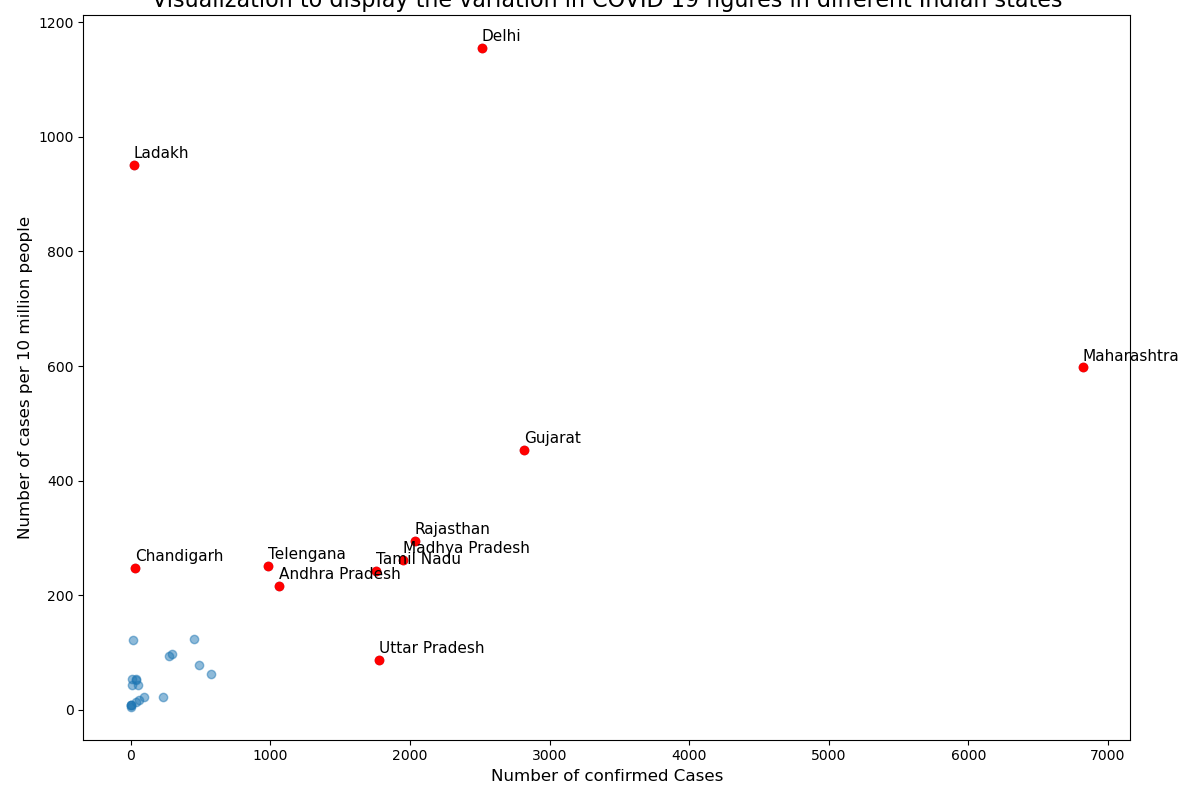

In [18]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=1000) | (covid19_df_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df_latest['Confirmed'], covid19_df_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
plt.scatter(df['Confirmed'], df['Cases/10million'], color="red")

for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)

plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()

So from both the table and the visualization, we realise that even if we take the state population in consideration, Maharashtra, Gujarat, Delhi, Rajasthan and Madhya Pradesh are badly hit indeed. In addition to these states come up other states and UTs like Tamil Nadu, Uttar Pradesh, Andhra Pradesh, Telengana, Chandigarh and Ladakh. However, things do look good for Ladakh as out of the 20 confirmed cases, 14 have already recovered. Same for Chandigarh where 15 out of the 28 confirmed cases have recovered.

Now that we have six vital features for every state, we can have a look at how these features are co-related to each other and derive some insights from that.

<IPython.core.display.Javascript object>


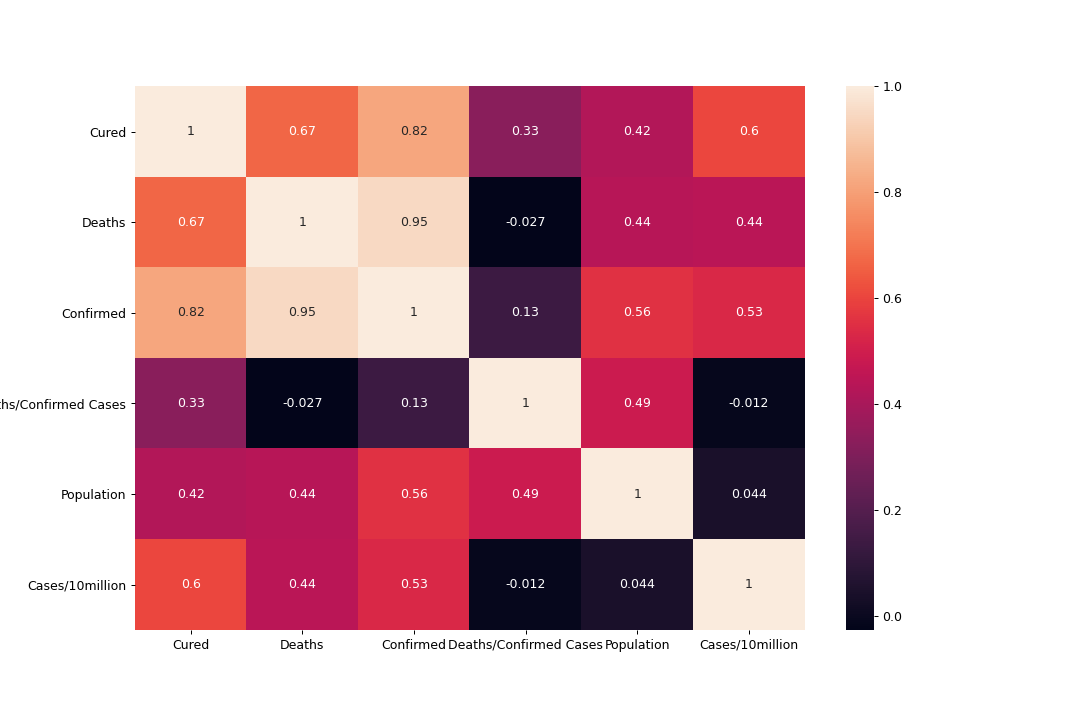

<AxesSubplot:>

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)

We notice that some measures like Confirmed, Cured, Deaths and Cases/10 million are very much co-related and we do not fret to realise the reason.

<h1> INDIVIDUAL DATA </h1>

Next up, we have a look at the individual case data which we have. On initial inspection of this dataset, we see that there are a huge number of missing data in this dataset which we must take into consideration as we move forward with our analysis.

In [20]:
individuals_df.isna().sum()

id                        0
government_id         15514
diagnosed_date            0
age                   16332
gender                14148
detected_city         15869
detected_district      3358
detected_state            0
nationality           16424
status_change_date      110
notes                  1318
dtype: int64

In [21]:
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

The first case in India due to COVID-19 was noticed on 30th January 2020. It was detected in the city of Thrissur in Kerala. The individual had a travel history in Wuhan.

In [22]:
individuals_grouped_district = individuals_df.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns = ['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       2268
Ahmadabad    1192
Indore        841
Pune          591
Jaipur        578
Name: id, dtype: int64

Next up, I decided to group the individual data in terms of district where the case was found. I had to be extra careful while doing this since there were some missing data in this column. From the data which was available, Mumbai is the worst hit district in the country. It has more than 2000 cases followed by Ahmedabad. Pune is another district in Maharashtra which figures in this list. All these districts belong to states which we had seen in the earlier graphs as well.

<IPython.core.display.Javascript object>


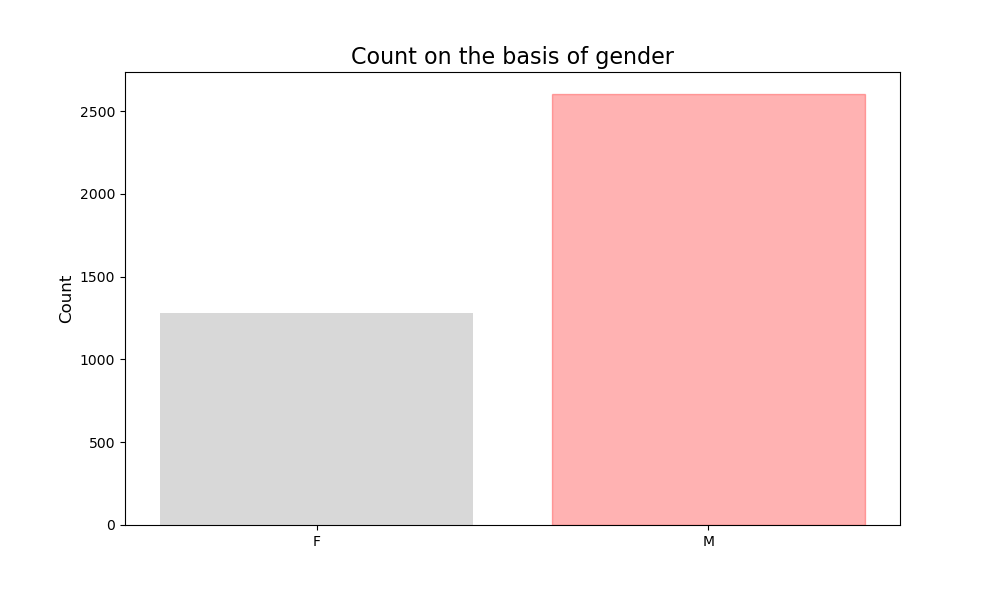

In [23]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()

plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(individuals_grouped_gender['gender'], individuals_grouped_gender['count'], align = 'center', color='grey', alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

Continuing our analysis, I thought about looking at how the case count is distributed according to gender. We see that there is no parity in this distribution. From the data, it seems that the virus is affecting males more than females in India. This is also validated by news article. You can read <a href = 'https://www.theguardian.com/commentisfree/2020/apr/07/coronavirus-hits-men-harder-evidence-risk'> this</a>.

<h1> PROGRESSION OF CASE COUNT IN INDIA </h1>

In this section, we will have a look at how the number of cases increased in India. Afterwards, we will inspect this curve and find similarities with the state-level curves.

For doing this analysis, I had to modify the dataset a bit. I grouped the data on the basis of the diagnosed data feature so that I had a count of number of cases detected each day throughout India. I followed this up by doing a cumulative sum of this feature and adding it to a new column.

In [24]:
individuals_grouped_date = individuals_df.groupby('diagnosed_date')
individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name = "count"))
individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply( 
   lambda x: pd.Series(str(x).split("/")))
individuals_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [25]:
individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
48,16/04/2020,1061,13431
49,17/04/2020,922,14353
50,18/04/2020,1371,15724
51,19/04/2020,1580,17304
52,20/04/2020,728,18032


This dataset contained data till the 20th of April. On that day, India had a total of 18,032 confirmed cases. We notice that the dataset contains data from 30th January but does not contain data in between since no cases were detected in that period. For the sake of continuity, I decided to assume 2nd March 2020 as Day 1 since we have data for every day since then.

<IPython.core.display.Javascript object>


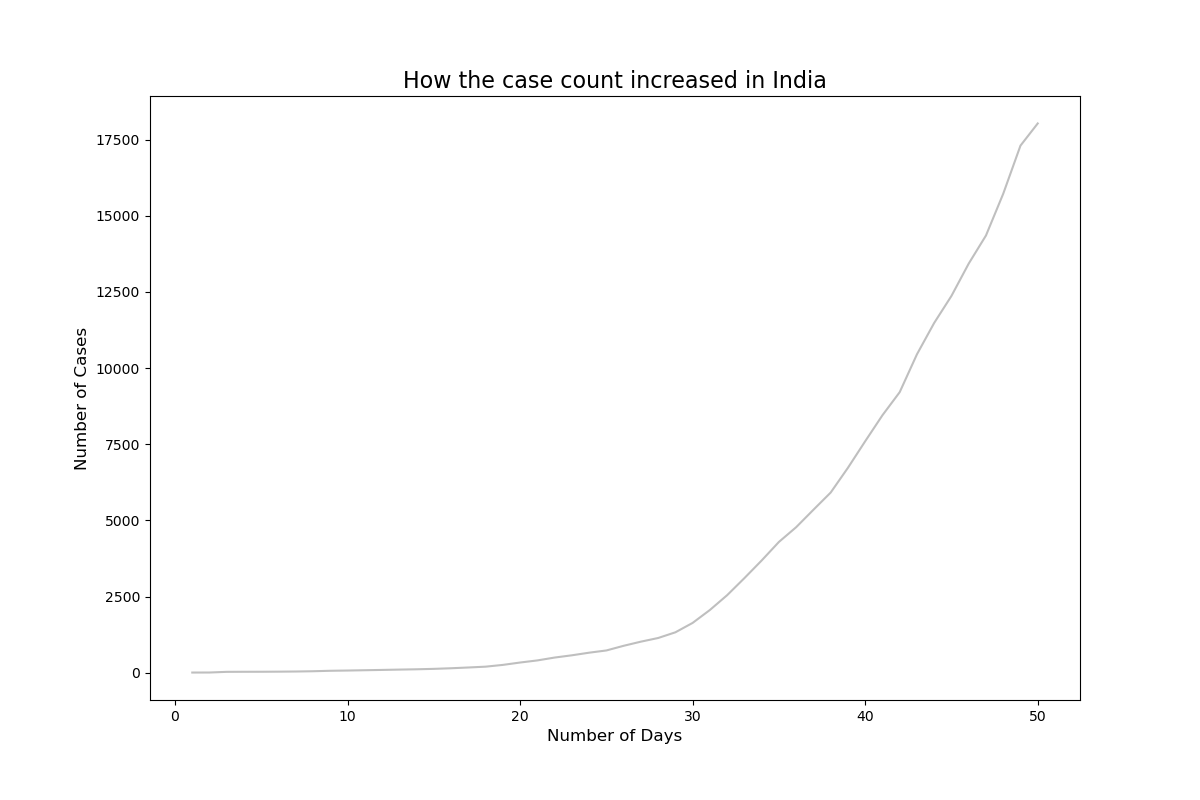

In [26]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
individuals_grouped_date['Day Number'] = individuals_grouped_date['Day Number'] - 2
individuals_grouped_date

plt.figure(figsize=(12,8), dpi=80)
plt.plot(individuals_grouped_date['Day Number'], individuals_grouped_date['Cumulative Count'], color="grey", alpha = 0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

In the above curve, we see that the rise was more or less steady till the 20th day mark. In the interval between 20-30, the curve inclined a little. This inclination gradually incremented and we see a steady and steep slope after 30-day mark with no signs of flattening. These are ominous indications.

In the next few code elements, I prepare and process the dataset to group the data in terms of different states. I used the following five states for this next analysis:
<li> Maharashtra </li>
<li> Kerala </li>
<li> Delhi </li>
<li> Rajasthan </li>
<li> Gujarat </li>

In [27]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory'] == "Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra = covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                           "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                           "State/UnionTerritory": ["Maharashtra"]*7,
                           "Deaths": [0]*7,
                           "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values, ignore_index = True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)
covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


In [28]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [29]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [30]:
covid19_rajasthan = covid19_df[covid19_df['State/UnionTerritory'] == "Rajasthan"]
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan = covid19_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_rajasthan['Day Count'] = covid19_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
covid19_rajasthan = covid19_rajasthan.append(missing_values, ignore_index = True)
covid19_rajasthan = covid19_rajasthan.sort_values(by="Day Count", ascending = True)
covid19_rajasthan.reset_index(drop=True, inplace=True)
print(covid19_rajasthan.shape)
covid19_rajasthan.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


In [31]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


All of the five states have 55 records with 5 features. Each record stands for every day. In this analysis as well, I decided to use 2nd March 2020 as Day 1 for the sake of consistency.

Let us now have a look at the visualization.

<IPython.core.display.Javascript object>


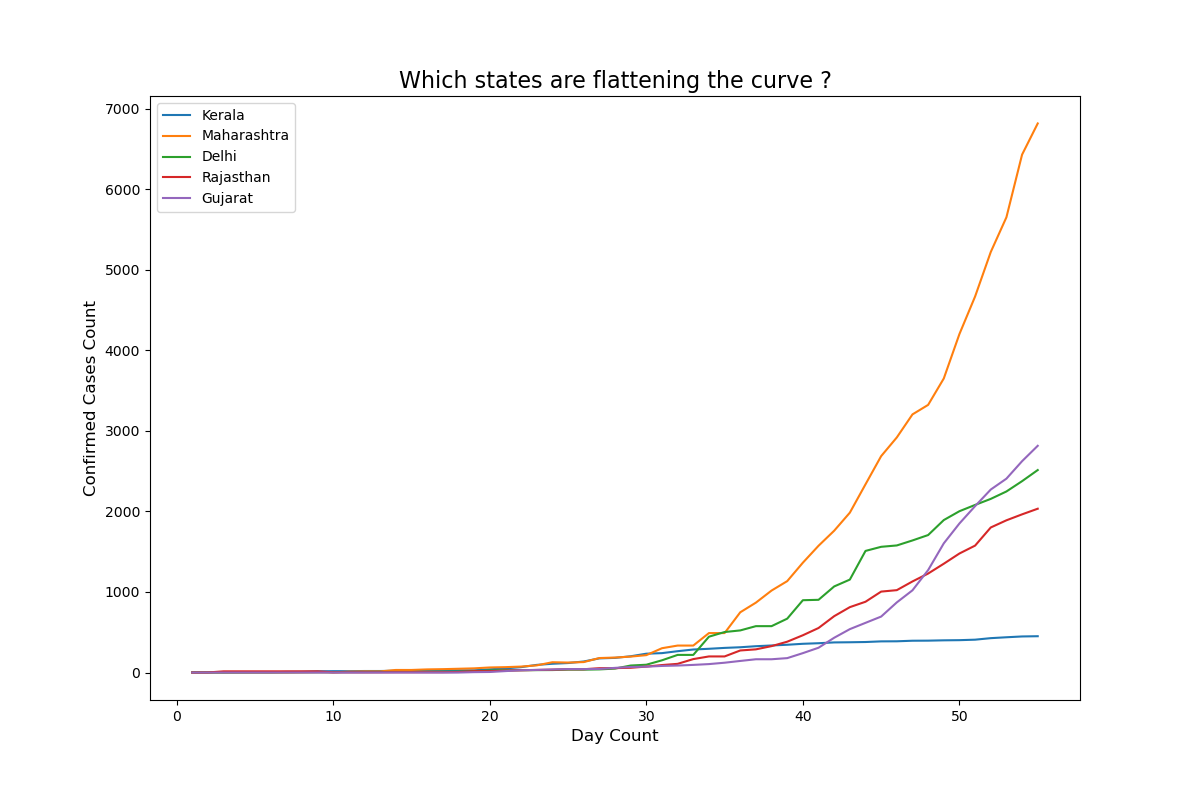

In [32]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_rajasthan['Day Count'], covid19_rajasthan['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()

We see almost all the curves follow the curve which is displayed by the nation as a whole. The only anomaly is that of Kerala. Kerala's curve saw the gradual incline in the period between 20-30 days as seen in other curves. But what Kerala managed to do was it did not let the curve incline further and manage to flatten the curve. As a result, the state has been able to contain the situation. 

The situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. Gujarat's curve steeped at a later time interval compared to the rest. It remained in control till the 30-day mark and the steep worsened after 40 days.

The only way we can as a whole prevent this impending crisis is by flattening the curve. All state governments needs to follow the Kerala model. It is the only state which managed to flatten the curve and hence, must have done most things right. It's time we followed the Kerala model.